## Minimum code for Figure 2 flow panels

In [57]:
suppressPackageStartupMessages(library(Biostrings))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(rasilabRtemplates))
suppressPackageStartupMessages(library(boot))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(plotrix))

In [58]:
theme <- theme(
        title = element_text(margin = margin(t=0, r=2, b=2, l=2), size=8),
        axis.title.x = element_text(margin = margin(t=2, r=2, b=0, l=2), size=8),
        axis.title.y = element_text(margin = margin(t=2, r=2, b=2, l=0), size=8),
        text = element_text(size = 8),
        legend.text=element_text(size=8),
        axis.line.x=element_line(linewidth=0.2),
        axis.line.y=element_line(linewidth=0.2),
        axis.ticks.y =  element_line(linewidth=0.2),
        axis.ticks.x = element_line(linewidth=0.2),
        axis.text.x = element_text(size=8),
        axis.text.y = element_text(size=8)
        )

In [59]:
if (!file.exists('../figures')){
    dir.create('../figures')
}

## Plot select dicodons flow

- (1148.1 = 9x_AGA, 1148.2 = 8x_AGA)

In [60]:
fcsfiles_plate1 <- '../../../../data/flow_cytometry/exp44_plate1' %>% 
  list.files(full.names = T)

samplenames_plate1 <- fcsfiles_plate1 %>% 
  stringr::str_match('([^/]+).fcs$') %>% 
  magrittr::extract(,2)

In [61]:
flowdata_plate1  <- fcsfiles_plate1 %>% 
  lapply(. %>%
         flowCore::read.FCS(transformation = F, alter.names = T) %>% 
         flowCore::exprs() %>%
         as_tibble()) %>%
  set_names(samplenames_plate1) %>% 
  bind_rows(.id = 'file') %>% 
  mutate_at(vars(contains('FITC|TexasRd')), funs(. - 2 * min(.)))  %>%
  mutate(tube = as.integer(str_extract(file, "[:digit:]+$")))

Warning message in readFCSdata(con, offsets, txt, transformation, which.lines, scale, :
“Some data values of 'PE.TexasRd.A' channel exceed its $PnR value 262144 and will be truncated!
 To avoid truncation, either fix $PnR before generating FCS or set 'truncate_max_range = FALSE'”
Warning message in readFCSdata(con, offsets, txt, transformation, which.lines, scale, :
“Some data values of 'FSC.A' channel exceed its $PnR value 262144 and will be truncated!
 To avoid truncation, either fix $PnR before generating FCS or set 'truncate_max_range = FALSE'”
Warning message in readFCSdata(con, offsets, txt, transformation, which.lines, scale, :
“Some data values of 'PE.TexasRd.A' channel exceed its $PnR value 262144 and will be truncated!
 To avoid truncation, either fix $PnR before generating FCS or set 'truncate_max_range = FALSE'”
Warning message in readFCSdata(con, offsets, txt, transformation, which.lines, scale, :
“Some data values of 'FSC.A' channel exceed its $PnR value 262144 and will b

In [62]:
annotations_plate1 <- read_csv("../annotations/sample_annotations_plates.csv") %>% 
  filter(plate == "1") %>%
  janitor::clean_names() %>% 
  mutate(file = str_extract(file, '([a-zA-Z]*)_([:digit:]+)_([A-Z][:digit:]+)_([A-Z][:digit:]+)'))

Rows: 96 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Desc, plasmid_RefID, parent_strain, flow_label, file, order
dbl (1): plate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [63]:
data1 <- flowdata_plate1 %>% 
  left_join(annotations_plate1, by = 'file') %>%
  select(-tube, -plate)

In [64]:
fcsfiles_plate2 <- '../../../../data/flow_cytometry/exp44_plate2' %>% 
  list.files(full.names = T) 

samplenames_plate2 <- fcsfiles_plate2 %>% 
  stringr::str_match('([^/]+).fcs$') %>% 
  magrittr::extract(,2) 

flowdata_plate2  <- fcsfiles_plate2 %>% 
  lapply(. %>%
         flowCore::read.FCS(transformation = F, alter.names = T) %>% 
         flowCore::exprs() %>%
         as_tibble()) %>%
  set_names(samplenames_plate2) %>% 
  bind_rows(.id = 'file') %>% 
  mutate_at(vars(contains('FITC|TexasRd')), funs(. - 2 * min(.)))  %>%
  mutate(tube = as.integer(str_extract(file, "[:digit:]+$")))

annotations_plate2 <- read_csv("../annotations/sample_annotations_plates.csv") %>% 
  filter(plate == "2") %>%
  janitor::clean_names() %>% 
  mutate(file = str_extract(file, '([a-zA-Z]*)_([:digit:]+)_([A-Z][:digit:]+)_([A-Z][:digit:]+)'))

data2 <- flowdata_plate2 %>% 
  left_join(annotations_plate2, by = 'file') %>%
  select(-tube, -plate)

Warning message in readFCSdata(con, offsets, txt, transformation, which.lines, scale, :
“Some data values of 'FSC.A' channel exceed its $PnR value 262144 and will be truncated!
 To avoid truncation, either fix $PnR before generating FCS or set 'truncate_max_range = FALSE'”
Warning message in readFCSdata(con, offsets, txt, transformation, which.lines, scale, :
“Some data values of 'SSC.A' channel exceed its $PnR value 262144 and will be truncated!
 To avoid truncation, either fix $PnR before generating FCS or set 'truncate_max_range = FALSE'”
Warning message in readFCSdata(con, offsets, txt, transformation, which.lines, scale, :
“Some data values of 'PE.TexasRd.A' channel exceed its $PnR value 262144 and will be truncated!
 To avoid truncation, either fix $PnR before generating FCS or set 'truncate_max_range = FALSE'”
Warning message in readFCSdata(con, offsets, txt, transformation, which.lines, scale, :
“Some data values of 'PE.TexasRd.A' channel exceed its $PnR value 262144 and will b

In [65]:
all_data <- bind_rows(data1, data2)
control_desc = c("WT", "WT_RFP", "Hel2-KO_RFP", "low_GFP", "high_GFP", "SCD")
alldata <- all_data %>%
  dplyr::rename('PE.Texas.Red.A' = 'PE.TexasRd.A') %>%
  dplyr::select(-order) %>%
  select(-Time) %>%
  mutate(flow_label = ifelse(is.na(flow_label), desc, flow_label)) %>%
  print()

# A tibble: 951,741 × 9
   file                FSC.A SSC.A  FITC.A PE.Te…¹ desc  plasm…² paren…³ flow_…⁴
   <chr>               <dbl> <dbl>   <dbl>   <dbl> <chr> <chr>   <chr>   <chr>  
 1 Specimen_002_B2_B… 25460. 241.    2.33   135.   WT    WT      NA      WT     
 2 Specimen_002_B2_B… 62522. 665.   -0.297  272.   WT    WT      NA      WT     
 3 Specimen_002_B2_B… 34193. 160.  -65.5    -24.8  WT    WT      NA      WT     
 4 Specimen_002_B2_B… 29150.  85.6 -45.5    -18.6  WT    WT      NA      WT     
 5 Specimen_002_B2_B… 83542. -64.8 -74.8    -78.8  WT    WT      NA      WT     
 6 Specimen_002_B2_B… 40400. 342.  -18.4    137.   WT    WT      NA      WT     
 7 Specimen_002_B2_B… 36281. 246.  -15.3     77.3  WT    WT      NA      WT     
 8 Specimen_002_B2_B… 25988. 196.  -11.8      7.81 WT    WT      NA      WT     
 9 Specimen_002_B2_B… 74577. 364.  -17.4    135.   WT    WT      NA      WT     
10 Specimen_002_B2_B… 37459. 262.  -52.3     91.2  WT    WT      NA      WT     
# … 

In [66]:
annotations <- bind_rows(annotations_plate1, annotations_plate2) %>%
  mutate(flow_label = ifelse(is.na(flow_label), desc, flow_label))

### Normalize each cell's YFP to RFP -> median per well

In [67]:
med_data_norm <- alldata %>%
  mutate(yfp_norm_rfp = FITC.A / PE.Texas.Red.A) %>% # per cell normalization
  group_by(flow_label, file) %>% # group by each well
  select(yfp_norm_rfp) %>%
  summarise_all(median) %>% # median normalized value of each well
  left_join(annotations, by = c('flow_label', 'file')) %>%
  print()

Adding missing grouping variables: `flow_label`, `file`


# A tibble: 96 × 8
# Groups:   flow_label [24]
   flow_label      file                yfp_n…¹ desc  plasm…² paren…³ plate order
   <chr>           <chr>                 <dbl> <chr> <chr>   <chr>   <dbl> <chr>
 1 Hel2-KO_RFP     Specimen_002_B4_B04 4.57e-4 Hel2… scHP52… NA          1 B04.…
 2 high_GFP        Specimen_002_B6_B06 4.13e-2 high… scHP20… NA          1 B06.…
 3 low_GFP         Specimen_002_B5_B05 4.36e-3 low_… scHP19… NA          1 B05.…
 4 SCD             Specimen_002_B7_B07 4.38e-2 SCD   Media   NA          1 B07.…
 5 scHP15-2-1120.1 Specimen_001_E2_E02 6.21e-2 GPD-… pHPSC1… scHP15…     2 E02.…
 6 scHP15-2-1120.1 Specimen_001_E3_E03 6.08e-2 GPD-… pHPSC1… scHP15…     2 E03.…
 7 scHP15-2-1120.1 Specimen_001_E4_E04 6.13e-2 GPD-… pHPSC1… scHP15…     2 E04.…
 8 scHP15-2-1120.1 Specimen_001_E5_E05 6.12e-2 GPD-… pHPSC1… scHP15…     2 E05.…
 9 scHP15-2-1120.1 Specimen_001_E6_E06 6.15e-2 GPD-… pHPSC1… scHP15…     2 E06.…
10 scHP15-2-1144.1 Specimen_002_C2_C02 2.81e-2 GPD-… pHPSC1… s

### Normalize YFP/RFP values by no-insert YFP/RFP value

In [68]:
# no insert controls are very similar in yfp/rfp between strains
no_insert_cntrls <- med_data_norm %>%
  group_by(desc, parent_strain, flow_label) %>%
  dplyr::filter(str_detect(desc, "cntrl")) %>%
  summarize(no_insert_avg = mean(yfp_norm_rfp)) %>% # avg of the wells per strain
  print()

all_norm_data <- med_data_norm %>% # normalize each well to the mean no-insert value
    left_join(no_insert_cntrls, by=c("parent_strain")) %>%
    dplyr::select(-flow_label.y, -desc.y,) %>%
    dplyr::rename(desc = desc.x) %>%
    dplyr::rename(flow_label = flow_label.x) %>%
    mutate(dicodon = ifelse(desc %in% control_desc, desc, str_extract(desc, "(?<=GPD-3xFLAG-PGK1-HA-8xdicodoon_)([:upper:]+_[:upper:]+)(?=-R1-T7-YFP)"))) %>%
    mutate(dicodon = ifelse(is.na(dicodon), "no_insert_cntrl", dicodon)) %>%
    group_by(parent_strain) %>%
    mutate(yfp_norm_rfp_norm = yfp_norm_rfp/no_insert_avg) %>%
    mutate(log_yfp_norm_rfp_norm = log2(yfp_norm_rfp) - log2(no_insert_avg)) %>%
    ungroup() %>%
    mutate(dicodon = ifelse(plasmid_ref_id == "pHPSC1148.1", "RR_AGAAGA_9x", dicodon)) %>%
    filter(!(yfp_norm_rfp_norm > 10)) %>% # get rid of the one huge outlier
    group_by(flow_label) %>% # all wells belonging to each strain
    mutate(stderr = std.error(yfp_norm_rfp_norm)) %>%
    mutate(stderr_log = std.error(log_yfp_norm_rfp_norm)) %>%
    mutate(diaa = str_split(dicodon, '_')[[1]][1]) %>%
    mutate(aa1 = ifelse(dicodon != 'no_insert_cntrl', str_sub(diaa, 1, 1), 'no_insert_cntrl')) %>%
    mutate(aa2 = ifelse(dicodon != 'no_insert_cntrl', str_sub(diaa, 2, 2), 'no_insert_cntrl')) %>%
    mutate(res1 = ifelse(dicodon != 'no_insert_cntrl', AMINO_ACID_CODE[aa1], 'no_insert_cntrl')) %>%
    mutate(res2 = ifelse(dicodon != 'no_insert_cntrl', AMINO_ACID_CODE[aa2], 'no_insert_cntrl')) %>%
    mutate(dipeptide = ifelse(dicodon != 'no_insert_cntrl', str_c(res1, res2),'no_insert_cntrl')) %>%
    ungroup() %>%
    print()

`summarise()` has grouped output by 'desc', 'parent_strain'. You can override
using the `.groups` argument.


# A tibble: 2 × 4
# Groups:   desc, parent_strain [2]
  desc                               parent_strain flow_label       no_insert_…¹
  <chr>                              <chr>         <chr>                   <dbl>
1 GPD-3xFLAG-PGK1-HA-cntrl-R1-T7-YFP scHP15-2      scHP15-2-1120.1        0.0614
2 GPD-3xFLAG-PGK1-HA-cntrl-R1-T7-YFP scHP520.1     scHP520.1-1120.1       0.0616
# … with abbreviated variable name ¹​no_insert_avg
# A tibble: 89 × 20
   flow_label    file  yfp_n…¹ desc  plasm…² paren…³ plate order no_in…⁴ dicodon
   <chr>         <chr>   <dbl> <chr> <chr>   <chr>   <dbl> <chr>   <dbl> <chr>  
 1 scHP15-2-112… Spec…  0.0621 GPD-… pHPSC1… scHP15…     2 E02.…  0.0614 no_ins…
 2 scHP15-2-112… Spec…  0.0608 GPD-… pHPSC1… scHP15…     2 E03.…  0.0614 no_ins…
 3 scHP15-2-112… Spec…  0.0613 GPD-… pHPSC1… scHP15…     2 E04.…  0.0614 no_ins…
 4 scHP15-2-112… Spec…  0.0612 GPD-… pHPSC1… scHP15…     2 E05.…  0.0614 no_ins…
 5 scHP15-2-112… Spec…  0.0615 GPD-… pHPSC1… scHP15…     2 E06.… 

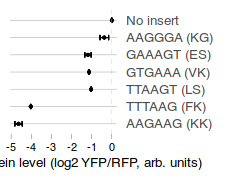

In [73]:
options(repr.plot.width=2, repr.plot.height=1.5)

order <- rev(c("No insert", 'AAGGGA (KG)', 'GAAAGT (ES)', "GTGAAA (VK)", "TTAAGT (LS)", "TTTAAG (FK)", "AAGAAG (KK)"))

all_norm_data %>%
  select(-desc, -plate, -order) %>%
  filter(parent_strain == "scHP15-2") %>%
  group_by(flow_label) %>%
  mutate(codons = str_split(dicodon, '_')[[1]][2]) %>%
  mutate(dipep2 = ifelse(dicodon != 'no_insert_cntrl', str_c(codons, " (", diaa, ")" ), 'No insert')) %>%
  filter(dipep2 %in% order) %>%
  mutate(mean = mean(log_yfp_norm_rfp_norm)) %>%
  mutate(facet = factor(dipep2, levels=order)) %>%
  ggplot(aes(y=facet, x=mean, xmax = mean + stderr_log, xmin = mean - stderr_log)) +
  geom_errorbar(width=0.3, size=0.3) +
  geom_point(size=0.4) +
  geom_vline(xintercept=0, color='grey', size=0.1, linetype=2) +
  scale_color_manual(values='black') +
  scale_y_discrete(position = "right") +
  theme + 
  theme(
      axis.line = element_blank(),
      axis.line.x = element_blank(),
      axis.line.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.ticks.x = element_line(size=0.1),
      panel.grid.major.y = element_line(color='grey', size=0.2),
      legend.text=element_blank(),
      axis.text.x = element_text(size=6.5),
      ) +
  labs(y="", x="Relative protein level (log2 YFP/RFP, arb. units)")

ggsave("../figures/select_dicodons_flow.pdf", width=2.8, height=1.4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


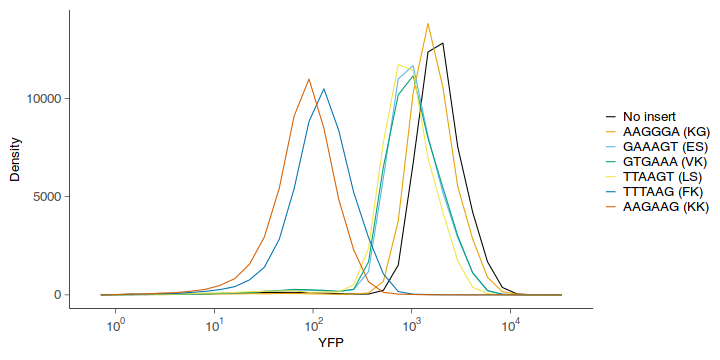

In [70]:
options(repr.plot.width=6, repr.plot.height=3)

alldata %>%
    filter(parent_strain == "scHP15-2") %>%
    mutate(dicodon = ifelse(desc %in% control_desc, desc, str_extract(desc, "(?<=GPD-3xFLAG-PGK1-HA-8xdicodoon_)([:upper:]+_[:upper:]+)(?=-R1-T7-YFP)"))) %>%
    mutate(dicodon = ifelse(is.na(dicodon), "no_insert_cntrl", dicodon)) %>%
    group_by(flow_label) %>%
    mutate(diaa = str_split(dicodon, '_')[[1]][1]) %>%
    mutate(codons = str_split(dicodon, '_')[[1]][2]) %>%
    mutate(dipep2 = ifelse(dicodon != 'no_insert_cntrl', str_c(codons, " (", diaa, ")" ), 'No insert')) %>%
    filter(dipep2 %in% order) %>%
    mutate(facet = factor(dipep2, levels=order)) %>%
    filter(FITC.A > 1) %>%
    ggplot() +
    geom_freqpoly(linewidth=0.3, aes(x=FITC.A, y=after_stat(count), color=facet)) +
    ggthemes::scale_color_colorblind() +
    scale_x_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
    ) +
    theme + 
    theme(
        legend.margin = margin(-10, 0, 0, -5),
        ) +
    guides(color = guide_legend(
                 keywidth=0.1,
                 keyheight=0.125,
                 default.unit="inch",
                 linewidth=0.2,
                 size=6.5)) +
    labs(x='YFP', y='Density', color='')

ggsave("../figures/select_dicodons_flow_yfp.pdf", width=3, height=1.25)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


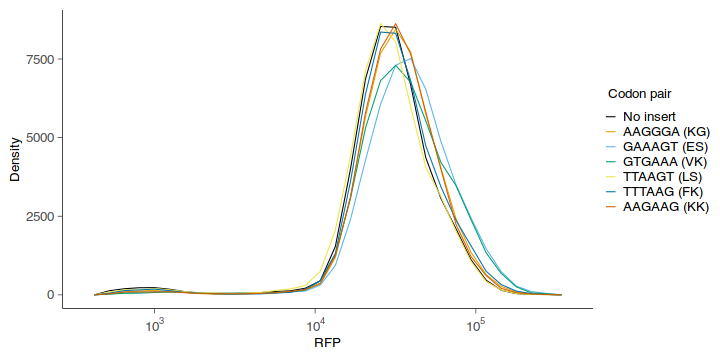

In [71]:
options(repr.plot.width=6, repr.plot.height=3)

alldata %>%
    filter(parent_strain == "scHP15-2") %>%
    mutate(dicodon = ifelse(desc %in% control_desc, desc, str_extract(desc, "(?<=GPD-3xFLAG-PGK1-HA-8xdicodoon_)([:upper:]+_[:upper:]+)(?=-R1-T7-YFP)"))) %>%
    mutate(dicodon = ifelse(is.na(dicodon), "no_insert_cntrl", dicodon)) %>%
    group_by(flow_label) %>%
    mutate(diaa = str_split(dicodon, '_')[[1]][1]) %>%
    mutate(codons = str_split(dicodon, '_')[[1]][2]) %>%
    mutate(dipep2 = ifelse(dicodon != 'no_insert_cntrl', str_c(codons, " (", diaa, ")" ), 'No insert')) %>%
    filter(dipep2 %in% order) %>%
    mutate(facet = factor(dipep2, levels=order)) %>%
    filter(PE.Texas.Red.A > 500) %>%
    ggplot() +
    geom_freqpoly(linewidth=0.3,) +
    aes(x=PE.Texas.Red.A, y=after_stat(count), color=facet) +
    ggthemes::scale_color_colorblind() +
    scale_x_log10(
    breaks = scales::trans_breaks("log10", n=3, function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
    ) +
    theme +
    theme(legend.margin = margin(-10, 0, 0, -5)) +
    guides(color = guide_legend(
                 keywidth=0.1,
                 keyheight=0.125,
                 default.unit="inch",
                 linewidth=0.2,
                 size=6.5)) +
    labs(x='RFP', y='Density', color='Codon pair')

ggsave("../figures/select_dicodons_flow_rfp.pdf", width=2.9, height=1.25)